<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/%EC%96%91%EC%9E%90%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_00_Quantum_Matrix_Multiplication_20230415.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
!python3 -m pip install qiskit[visualization]
!python3 -m pip install qiskit-aer
!python3 -m pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-uc7wt_kw
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-uc7wt_kw
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0ae905083ec3872d7ddc6bb4001d5468f476d93f
  Preparing metadata (setup.py) ... done


In [202]:
import qiskit
import qiskit_aer
import numpy

print(qiskit.__version__)
print(qiskit_aer.__version__)
print(numpy.__version__)

1.0.2
0.14.0.1
1.25.2


In [203]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
import math
import numpy as np

In [204]:
# 벡터 정의
vector1 = np.array([1 / np.sqrt(2), 1 / np.sqrt(2)])
vector2 = np.array([1 / np.sqrt(2), -1 / np.sqrt(2)])

# 내적 계산
dot_product = np.dot(vector1, vector2)

# 결과 출력
print("두 벡터의 내적:", dot_product)


두 벡터의 내적: 0.0


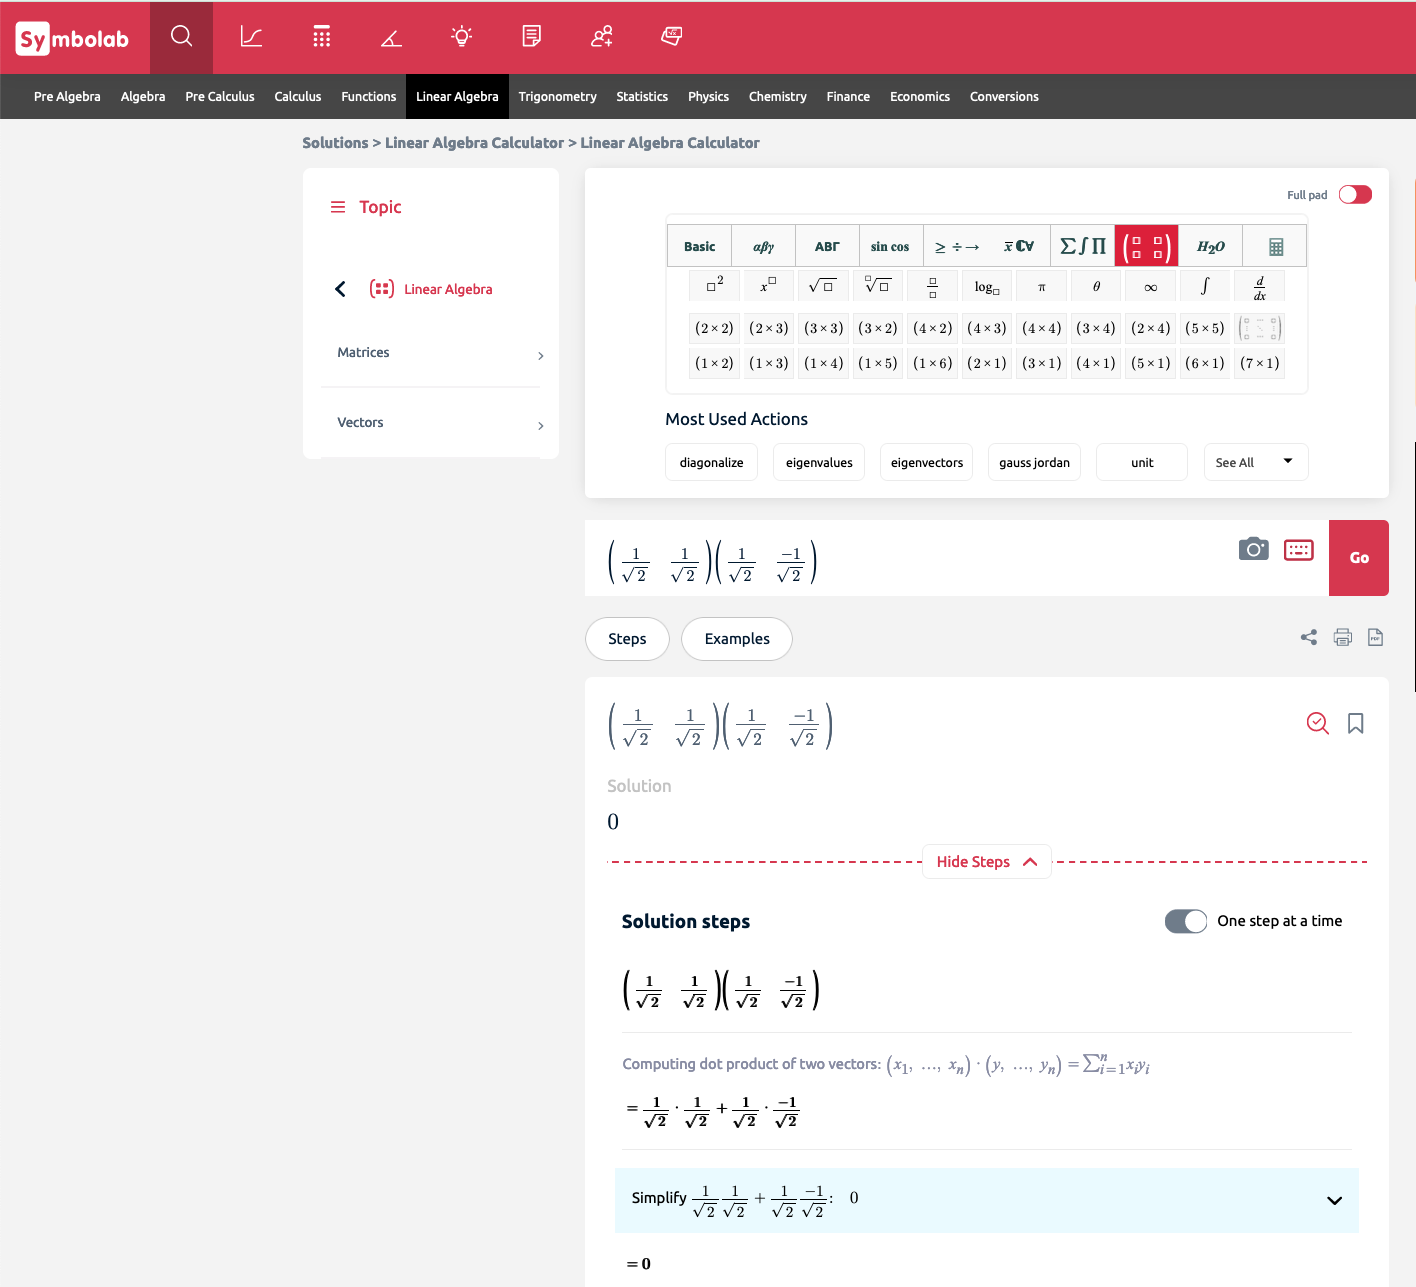

In [205]:
# 두 벡터를 정의합니다.
#vector1 = [1 / 2 ** 0.5, 1 / 2 ** 0.5]
#vector2 = [1 / 2 ** 0.5, -1 / 2 ** 0.5]

vector1 = [1 / np.sqrt(2), 1 / np.sqrt(2)]
vector2 = [1 / np.sqrt(2), -1 / np.sqrt(2)]

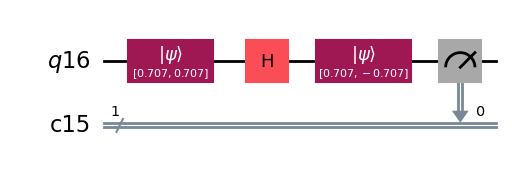

In [206]:
# 양자 레지스터와 클래식 레지스터를 생성합니다.
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)

# 두 벡터를 상태로 변환합니다.
circuit.initialize(vector1, qr[0])

# Hadamard 게이트를 추가합니다.
circuit.h(qr[0])

# 두 번째 벡터에 대한 상태 준비를 추가합니다.
circuit.initialize(vector2, qr[0])

# 측정을 추가합니다.
circuit.measure(qr, cr)
circuit.draw('mpl')

In [207]:
from qiskit_textbook.widgets import state_vector_exercise
from qiskit_textbook.tools import array_to_latex

In [215]:
backend = Aer.get_backend(name='statevector_simulator') # the device to run on

result = backend.run(circuit, shots=4056).result()
out_state = result.get_statevector()
counts = result.get_counts()

print("Qubit State: " + str(out_state))

#display(qc.draw('mpl'))
print("\n")
array_to_latex(out_state, pretext="\\text{Statevector} = ", precision=1)
print("\n")


Qubit State: Statevector([ 1.+0.j, -0.+0.j],
            dims=(2,))




<IPython.core.display.Math object>

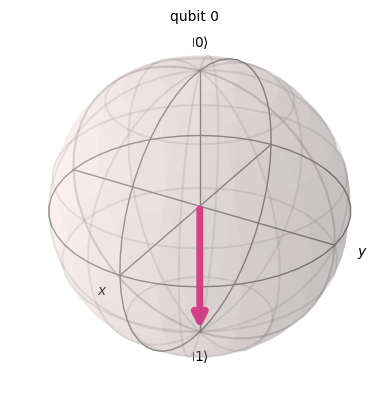

In [209]:
plot_bloch_multivector(out_state)

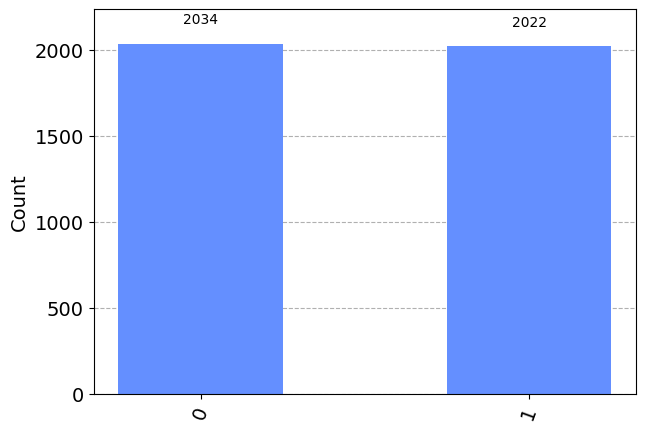

In [210]:
from qiskit.visualization import plot_bloch_multivector, plot_histogram
# 결과를 시각화합니다.
plot_histogram(counts)

In [211]:
import qiskit.utils
qiskit.utils.local_hardware_info()

{'python_compiler': 'GCC 11.4.0',
 'python_build': 'main, Nov 20 2023 15:14:05',
 'python_version': '3.10.12',
 'os': 'Linux',
 'cpus': 1}